In [114]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

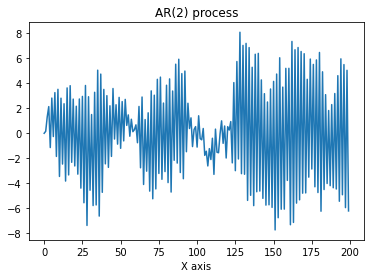

In [115]:
N = 200
alpha = np.array([.6, -.4])
k = len(alpha)

x = np.zeros(N)

for i in range(k, N):
  x[i] = sum(alpha * x[i-k:i]) + np.random.randn()

x += np.sin(np.linspace(0, 10 * np.pi, N))

plt.plot(x)
plt.xlabel('X axis')
plt.title('AR(%s) process'%k)
plt.show()

In [116]:
fourierCoefficients = np.zeros(N,dtype=complex)
# time vector
t = np.arange(N)/N

for f in range(N):
  # 1. create the complex sin wave
  complexSinWave = np.exp(-1j * 2 * np.pi * f * t)
  # 2. compute the dot product between the sin wave and the signal
  fourierCoefficients[f] = np.dot(complexSinWave,x)

fourierCoefficients2 = np.fft.fft(x)

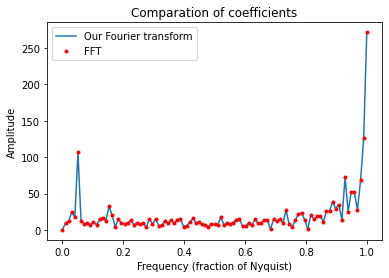

In [117]:
hz = np.linspace(0,1,(N//2) - 1)
plt.plot(hz,np.abs(fourierCoefficients[:len(hz)]), label='Our Fourier transform')
plt.plot(hz,np.abs(fourierCoefficients2[:len(hz)]), 'r.', label='FFT')
plt.legend()
plt.xlabel('Frequency (fraction of Nyquist)')
plt.ylabel('Amplitude')
plt.title('Comparation of coefficients')
plt.show()

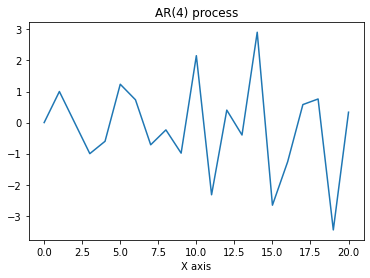

In [118]:
N = 21
alpha = np.array([.6, .3, .1, -0.4])
k = len(alpha)

x = np.zeros(N)

for i in range(k, N):
  x[i] = sum(alpha * x[i-k:i]) + np.random.randn()

x += np.sin(np.linspace(0, 10 * np.pi, N))

plt.plot(x)
plt.xlabel('X axis')
plt.title('AR(%s) process'%k)
plt.show()

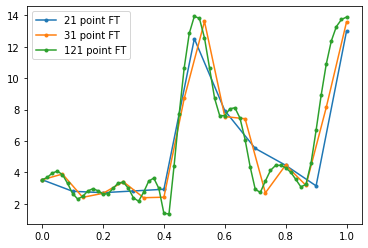

In [119]:
for i in range(3):
  # specify the number of fft points including zero-padding
  points = N + 10**i - (1 if i == 0 else 0)
  # compute fft
  xX = np.fft.fft(x, n=points)
  # compute the hz vector
  hz = np.linspace(0, 1, (points//2) + 1)
  # plot the amplitude spectrum
  plt.plot(hz, np.abs(xX[:len(hz)]), '.-', label='%s point FT'%points)

plt.legend()
plt.show()

In [120]:
# Welch's method

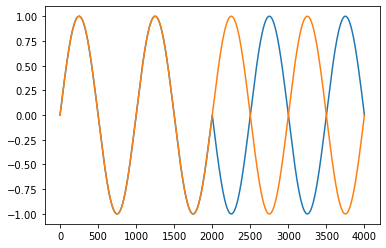

In [121]:
N = 2000
t = np.linspace(0,4*np.pi,N)

s1 = np.concatenate((np.sin(t), -np.sin(t)))
s2 = np.concatenate((np.sin(t),  np.sin(t)))

plt.plot(s1)
plt.plot(s2)
plt.show()

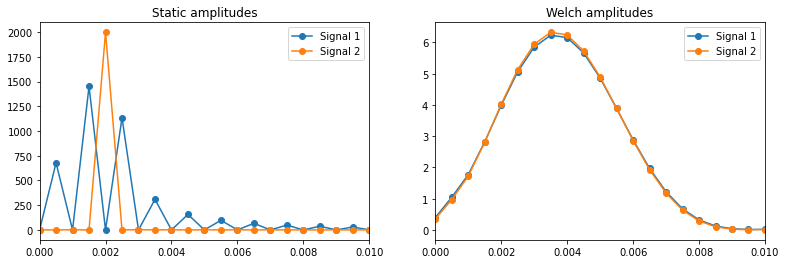

In [131]:
staticX1 = np.fft.fft(s1)
staticX2 = np.fft.fft(s2)
staticHz = np.linspace(0, 1, len(s1)//2 + 1)

welchHz1,welchX1 = welch(s1, nfft=N)
welchHz2,welchX2 = welch(s2, nfft=N)

fig,ax = plt.subplots(1,2,figsize=(13, 4))
ax[0].plot(staticHz, np.abs(staticX1[:len(staticHz)]), '-o', label='Signal 1')
ax[0].set_xlim([0, 0.01])
ax[0].plot(staticHz, np.abs(staticX2[:len(staticHz)]), '-o', label='Signal 2')
ax[0].set_xlim([0, 0.01])
ax[0].legend()
ax[0].set_title('Static amplitudes')

ax[1].plot(welchHz1, np.abs(welchX1[:len(staticHz)]), '-o', label='Signal 1')
ax[1].set_xlim([0, 0.01])
ax[1].plot(welchHz2, np.abs(welchX2[:len(staticHz)]), '-o', label='Signal 2')
ax[1].set_xlim([0, 0.01])
ax[1].legend()
ax[1].set_title('Welch amplitudes')

plt.show()